In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
df = pd.read_csv('train.csv')

In [29]:
df.head(3)

,ID,STAY_DRG_CD,STAY_FROM_DT,STAY_THRU_DT,STUS_CD,TYPE_ADM,SRC_ADMS,AD_DGNS,DGNSCD01,PRCDRCD01,...,DGNSCD22,PRCDRCD22,DGNSCD23,PRCDRCD23,DGNSCD24,PRCDRCD24,DGNSCD25,PRCDRCD25,stay_drg_cd,Readmitted_30
0,17319,NaN,2017-12-13 00:00:00,2017-12-20 00:00:00,62,1,2,M25551,S72001A,0SRR01Z,...,Z803,NaN,Z86711,NaN,Z86718,NaN,Z85828,NaN,469,0
1,19722,NaN,2017-10-19 00:00:00,2017-10-23 00:00:00,1,1,1,R531,A419,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,871,1
2,89699,NaN,2018-08-06 00:00:00,2018-08-08 00:00:00,1,1,1,R002,J690,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177,0


In [624]:
df.shape

(130296, 60)

In [625]:
df.duplicated().sum()

np.int64(0)

In [626]:
# engineering of diagnostic and procedure features
# apply all three methods

# Pre-processing

#### Checking Nulls

**Percentage of nulls**

In [627]:
# while exploring the data, we found that some columns contain '-' token as null value, so replace it with null

df = df.replace('-', pd.NA)

In [628]:
nulls = df.isna().sum()

Trows = df.shape[0] # number of rows in the dataset


# sort the nulls in descending order
nulls = nulls[nulls > 0].sort_values(ascending=False)
for i in nulls.index:
    if nulls[i] > 0:
        print(f"{i} has {(nulls[i]/Trows)*100}% null values")



PRCDRCD25 has 99.98234788481611% null values
PRCDRCD24 has 99.9739055688586% null values
PRCDRCD23 has 99.96623073616995% null values
PRCDRCD22 has 99.95548597040585% null values
PRCDRCD21 has 99.94474120464174% null values
PRCDRCD20 has 99.93169398907104% null values
PRCDRCD19 has 99.91557684042488% null values
PRCDRCD18 has 99.89178485909007% null values
PRCDRCD17 has 99.86876036102413% null values
PRCDRCD16 has 99.83345613065634% null values
PRCDRCD15 has 99.78280223491129% null values
PRCDRCD14 has 99.6953091422607% null values
PRCDRCD13 has 99.59630380057715% null values
PRCDRCD12 has 99.46352919506354% null values
PRCDRCD11 has 99.2839381101492% null values
PRCDRCD10 has 99.01915638239086% null values
PRCDRCD09 has 98.71062810830725% null values
PRCDRCD08 has 98.24399828083747% null values
PRCDRCD07 has 97.49186467735004% null values
STAY_DRG_CD has 97.08509854485172% null values
PRCDRCD06 has 95.84331061582857% null values
PRCDRCD05 has 93.59458463805488% null values
PRCDRCD04 h

In [629]:
# count coulmns greater than 50% null values
nulls_50 = nulls[nulls > (Trows*0.5)]
print(f"Columns with more than 50% null values: {len(nulls_50)}")
# count coulmns greater than 50% null values
nulls_60 = nulls[nulls > (Trows*0.6)]
print(f"Columns with more than 60% null values: {len(nulls_60)}")
# count coulmns greater than 70% null values
nulls_70 = nulls[nulls > (Trows*0.7)]
print(f"Columns with more than 70% null values: {len(nulls_70)}")
# count coulmns greater than 80% null values
nulls_80 = nulls[nulls > (Trows*0.8)]
print(f"Columns with more than 80% null values: {len(nulls_80)}")

Columns with more than 50% null values: 34
Columns with more than 60% null values: 31
Columns with more than 70% null values: 29
Columns with more than 80% null values: 25


In [630]:
# Findings:
#     most of the nulls are in diagnostic and procedure features



#### STAY_DRG_CD
This column appeared twice in our dataset, rows which are null in first occurenece are filled in second and vice versa so concatenating them


In [ ]:
# Diagnosis-Related Group code associated with the stay
print("STAY_DRG_CD null count:", df['STAY_DRG_CD'].isna().sum())
print("stay_drg_cd null count:", df['stay_drg_cd'].isna().sum())

STAY_DRG_CD null count: 126498
stay_drg_cd null count: 8163


In [632]:
# Fill the null values in STAY_DRG_CD with values from stay_drg_cd
df['STAY_DRG_CD'] = df['STAY_DRG_CD'].fillna(df['stay_drg_cd'])

In [633]:
nulls_in_SDC = df['STAY_DRG_CD'].isna().sum()

rows = df.shape[0]

print(f'Nulls in STAY_DRG_CD are: {nulls_in_SDC} which is {(nulls_in_SDC/rows)*100}% of total data',)

Nulls in STAY_DRG_CD are: 4365 which is 3.3500644685945846% of total data


In [634]:
# fill na with mode

df['STAY_DRG_CD'] = df['STAY_DRG_CD'].fillna(df['STAY_DRG_CD'].mode()[0])

In [635]:
df.drop(columns=['stay_drg_cd'], inplace=True)

In [636]:
df['STAY_DRG_CD'] = df['STAY_DRG_CD'].astype('int')


#### ID

In [ ]:
# we can drop it as it has no useful information

In [639]:
df.drop(columns=['ID'], inplace=True)

#### Date

In [640]:
# we have admitted date and discharge date, we can calculate the length of stay for each patient.

df['STAY_FROM_DT'] = pd.to_datetime(df['STAY_FROM_DT'])
df['STAY_THRU_DT'] = pd.to_datetime(df['STAY_THRU_DT'])

In [641]:
df['LENGTH_OF_STAY'] = (df['STAY_THRU_DT'] - df['STAY_FROM_DT']).dt.days

In [ ]:

df['admit_dayofweek'] = df['STAY_FROM_DT'].dt.dayofweek

df['discharge_month'] = df['STAY_THRU_DT'].dt.month

# Why it matters:
#   Admits on Fridays/Saturdays might mean less follow-up planning → more readmissions.
#   Certain months (e.g., flu season) might show patterns in readmissions.


In [643]:
df['LENGTH_OF_STAY'].isna().sum()

np.int64(0)

In [644]:
df.drop(columns=['STAY_FROM_DT','STAY_THRU_DT'], inplace=True)

#### STUS_CD - Patient Discharge Status code

In [645]:
# Extremely useful. Discharge to a skilled nursing facility, hospice, or readmission facility often signals poor outcomes → high chance of readmission.

In [34]:
stus_cd_counts = df['STUS_CD'].value_counts()
stus_cd_counts

STUS_CD
1     56886
3     40498
6     22420
62     6131
63     4361
Name: count, dtype: int64

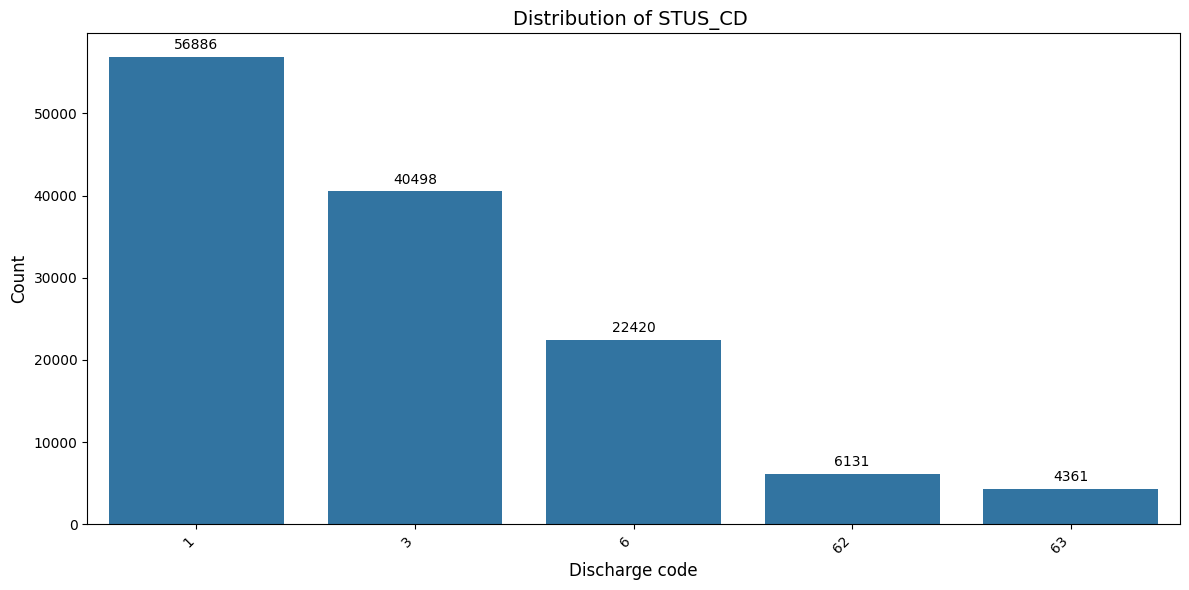

In [35]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=stus_cd_counts.index, y=stus_cd_counts.values)
plt.title('Distribution of STUS_CD ', fontsize=14)
plt.xlabel('Discharge code', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, count in enumerate(stus_cd_counts.values):
    ax.text(i, count + (max(stus_cd_counts.values) * 0.01), f'{count}', 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [647]:
df.groupby('STUS_CD')['Readmitted_30'].mean()
# patient with code 3,6 have slightly more change to come back to hospital.

STUS_CD
1     0.185775
3     0.229024
6     0.231401
62    0.183657
63    0.124054
Name: Readmitted_30, dtype: float64

In [648]:
# This code describes how and where the patient was discharged, for example:

# 1 – Discharged to home/self-care
# 3 – Discharged/transferred to SNF (Skilled Nursing Facility)
# 6 – Discharged/transferred to home with home health services
# 62 – Discharged/transferred to inpatient rehabilitation
# 63 – Discharged/transferred to long-term hospital

# These are standard CMS codes


# STUS_CD is a categorical code, not a numeric measurement. so no need to normalize it, but we can encode it using label encoding. (ordinal encoding)


In [649]:
df['STUS_CD'].isna().sum()

np.int64(0)

In [650]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['STUS_CD_encoded'] = le.fit_transform(df['STUS_CD'])
df.drop(columns=['STUS_CD'], inplace=True)

#### TYPE_ADM - Admission Type code

In [ ]:
# How the patient was admitted — e.g., elective, emergency, urgent, newborn, etc.

# 1 – Elective admission>
# 2 – Emergency admission
# 3 – Urgent admission
# 5 – Newborn admission
# 9 – Other admission type

# as this is again a categorical column so no need to normalize, we can encode it using label encoding.

In [652]:
# Clinically, this feature is very important, as it often correlates with the urgency of the condition and thus the likelihood of readmission.

# Emergency or urgent admissions generally carry higher readmission risks compared to planned, elective ones.

In [32]:
TYPE_ADM_valuecount = df['TYPE_ADM'].value_counts()
TYPE_ADM_valuecount

TYPE_ADM
1    108830
3     11993
2      9259
5       145
9        69
Name: count, dtype: int64

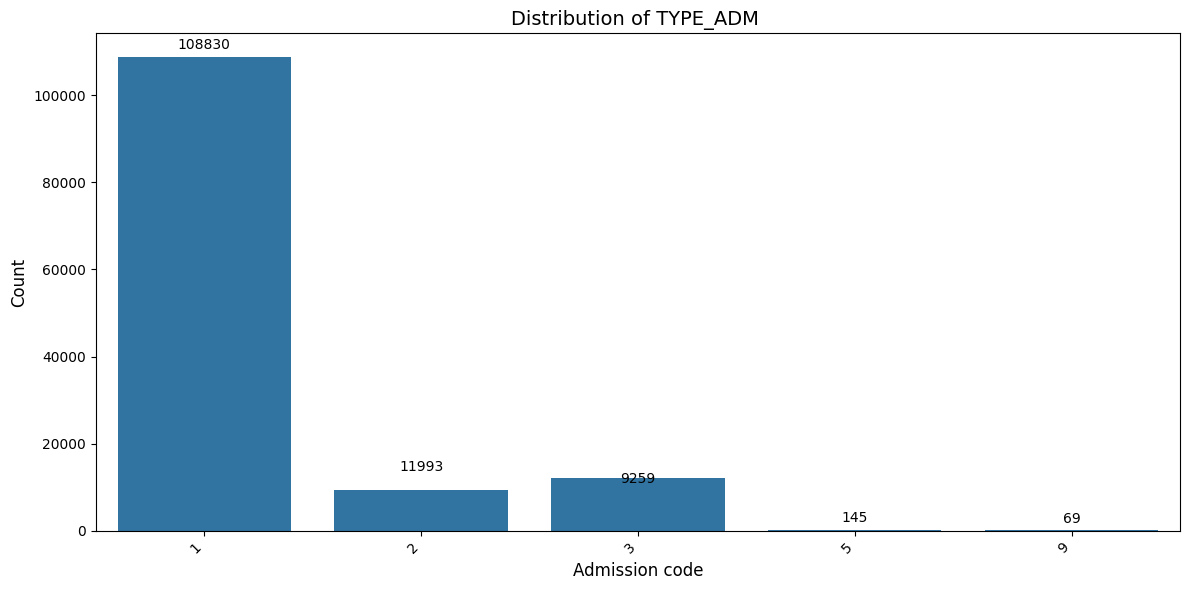

In [33]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=TYPE_ADM_valuecount.index, y=TYPE_ADM_valuecount.values)
plt.title('Distribution of TYPE_ADM ', fontsize=14)
plt.xlabel('Admission code', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, count in enumerate(TYPE_ADM_valuecount.values):
    ax.text(i, count + (max(TYPE_ADM_valuecount.values) * 0.01), f'{count}', 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [654]:
df['TYPE_ADM'].isna().sum()

np.int64(0)

In [655]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['TYPE_ADM_encoded'] = le.fit_transform(df['TYPE_ADM'])

df.drop(columns=['TYPE_ADM'], inplace=True)

#### SRC_ADMS - admission source code

In [36]:
src_adms_counts = df['SRC_ADMS'].value_counts()
src_adms_counts

SRC_ADMS
1    106269
5     12946
2     11081
Name: count, dtype: int64

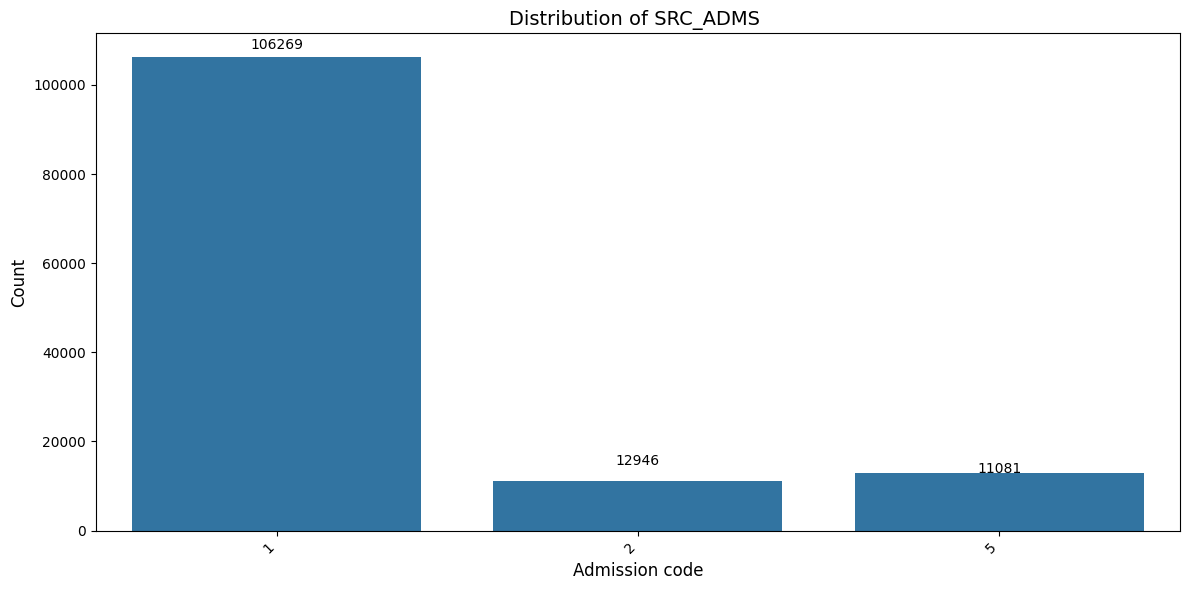

In [38]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=src_adms_counts.index, y=src_adms_counts.values)
plt.title('Distribution of SRC_ADMS ', fontsize=14)
plt.xlabel('Admission code', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, count in enumerate(src_adms_counts.values):
    ax.text(i, count + (max(src_adms_counts.values) * 0.01), f'{count}', 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [657]:
# Again a categorical column.

# This feature indicates the source of the admission, such as:
# The admission source indicates where the patient came from before being admitted to the hospital. Typical codes might represent:

# 1 – Emergency room (ER)
# 2 – Referral from another hospital or clinic
# 5 – Other sources (e.g., physician's office, home, etc.)

In [658]:
df['SRC_ADMS'].isna().sum()

np.int64(0)

In [659]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['SRC_ADMS_encoded'] = le.fit_transform(df['SRC_ADMS'])
df.drop(columns=['SRC_ADMS'], inplace=True)

#### AD_DGNS - admitting Diagnosis Code

In [660]:
#  describe the condition the patient was admitted for.

# Admitting diagnosis is crucial for understanding the severity and urgency of the patient’s condition.
# Certain diagnoses are associated with higher risk of readmission — for example, heart failure, pneumonia, or chronic diseases like diabetes or hypertension.

In [661]:
df['AD_DGNS'].nunique() # there are too many different admitting codes

2259

In [662]:
target_encoded = df.groupby('AD_DGNS')['Readmitted_30'].mean()

df['AD_DGNS_encoded'] = df['AD_DGNS'].map(target_encoded)

df.drop(columns=['AD_DGNS'], inplace=True)

In [663]:
df['AD_DGNS_encoded'].isna().sum()

np.int64(4365)

In [664]:
# Calculate global mean of the target as fallback
global_mean = df['Readmitted_30'].mean()

# Fill NaNs with the global mean
df['AD_DGNS_encoded'] = df['AD_DGNS_encoded'].fillna(global_mean)


In [665]:
import joblib

joblib.dump(global_mean, 'global_mean.pkl')

joblib.dump(target_encoded, 'target_encoded.pkl')

['target_encoded.pkl']

#### Analyzing procedure and diagnosis columns

##### some analysis

In [666]:
def check_procedure_pattern(row):
    """
    Checks if procedures follow the pattern:
    If procedure n is missing, then all procedures n+1 to 25 are also missing
    Returns True if pattern holds, False otherwise
    """
    proc_columns = [f'PRCDRCD{str(i).zfill(2)}' for i in range(1, 26)]
    first_empty = None

    for i, col in enumerate(proc_columns):
        if pd.isna(row[col]) or row[col] == '' :
            first_empty = i
            break

    if first_empty is None:  # All procedures are filled
        return True

    # Check if all procedures after first_empty are also empty
    for col in proc_columns[first_empty:]:
        if not pd.isna(row[col]) and row[col] != '':
            return False

    return True

In [667]:
df_temp  = df.copy()

# Apply the function to each row
df_temp['follows_pattern'] = df_temp.apply(check_procedure_pattern, axis=1)

# Count pattern compliance
pattern_count = df_temp['follows_pattern'].value_counts()
print("Procedure Pattern Compliance:")
print(pattern_count)
print(f"Percentage of rows following pattern: {100 * pattern_count.get(True, 0) / len(df_temp):.2f}%")

Procedure Pattern Compliance:
follows_pattern
True    130296
Name: count, dtype: int64
Percentage of rows following pattern: 100.00%


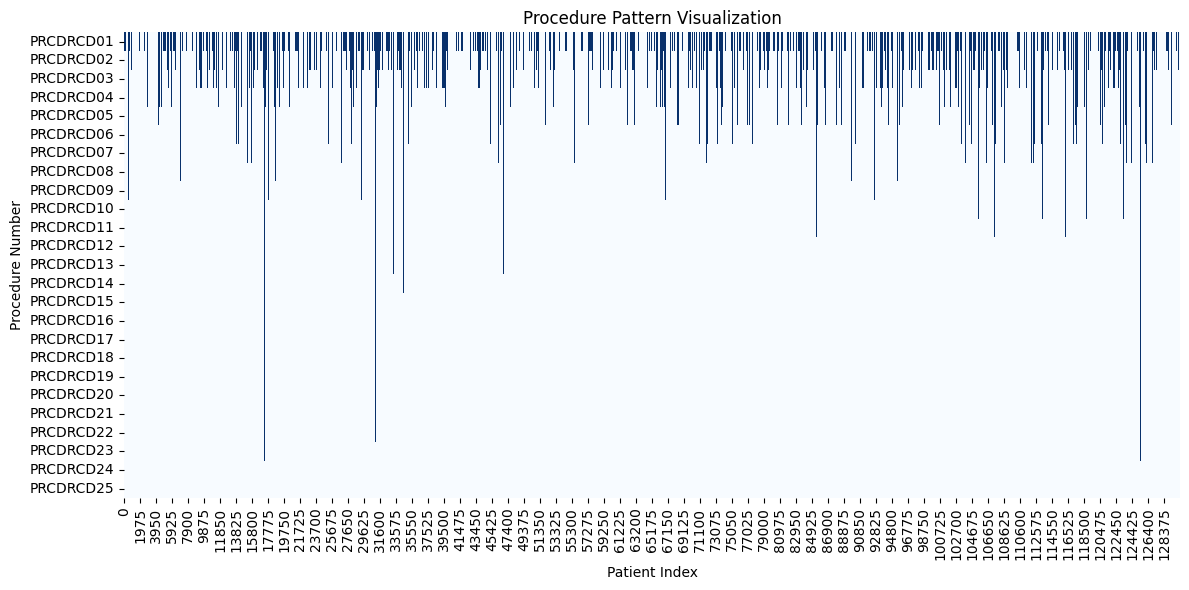

In [668]:
# Visualize procedure presence
# Create a matrix where 1 means procedure exists, 0 means not exists
proc_presence = pd.DataFrame()
for i in range(1, 26):
    col = f'PRCDRCD{str(i).zfill(2)}'
    proc_presence[col] = (~df_temp[col].isna() & (df_temp[col] != '')).astype(int)


# Visualize the procedure pattern
plt.figure(figsize=(12, 6))
sns.heatmap(proc_presence.T, cmap='Blues', cbar=False)
plt.title('Procedure Pattern Visualization')
plt.xlabel('Patient Index')
plt.ylabel('Procedure Number')
plt.tight_layout()
plt.show()

In [669]:
# by above analysis, we found that if a procedure is missing, all subsequent procedures are also missing. so nulls in procedure does't means that the procedure was not recorded but it means that the patient didn't have/need that procedure.

In [670]:
# Let's check if the same pattern exists for diagnosis features
def check_diagnosis_pattern(row):
    """
    Checks if diagnoses follow the pattern:
    If diagnosis n is missing, then all diagnoses n+1 to 25 are also missing
    Returns True if pattern holds, False otherwise
    """
    diag_columns = [f'DGNSCD{str(i).zfill(2)}' for i in range(1, 26)]
    first_empty = None

    for i, col in enumerate(diag_columns):
        if pd.isna(row[col]) or row[col] == '':
            first_empty = i
            break

    if first_empty is None:  # All diagnoses are filled
        return True

    # Check if all diagnoses after first_empty are also empty
    for col in diag_columns[first_empty:]:
        if not pd.isna(row[col]) and row[col] != '':
            return False

    return True

In [671]:
df_temp  = df.copy()

# Apply the function to each row
df_temp['diag_follows_pattern'] = df_temp.apply(check_diagnosis_pattern, axis=1)

# Count pattern compliance
pattern_count = df_temp['diag_follows_pattern'].value_counts()
print("Diagnosis Pattern Compliance:")
print(pattern_count)
print(f"Percentage of rows following pattern: {100 * pattern_count.get(True, 0) / len(df_temp):.2f}%")

Diagnosis Pattern Compliance:
diag_follows_pattern
True    130296
Name: count, dtype: int64
Percentage of rows following pattern: 100.00%


In [672]:
# Diagnosis columns are also following the same pattern.

# Now we can reduce these 50 columns to 2 columns. these columns will indicate that how many procedures/diagnosis were performed on the patient.

# this is the first and most simplest approach to reduce the number of columns.



In [673]:
# get all unique diagnosis codes
unique_diagnosis_codes = set()
all_diagnosis_codes = []
for i in range(1, 26):
    col = f'DGNSCD{str(i).zfill(2)}'
    unique_diagnosis_codes.update(df[col].dropna().unique())
    all_diagnosis_codes.extend(df[col].dropna())

print(f"Total unique diagnosis codes: {len(unique_diagnosis_codes)}")
print(f"all diagnosis codes: {len(all_diagnosis_codes)}")
# get all unique diagnosis codes
unique_procedure_codes = set()
all_procedure_codes = []
for i in range(1, 26):
    col = f'PRCDRCD{str(i).zfill(2)}'
    unique_procedure_codes.update(df[col].dropna().unique())
    all_procedure_codes.extend(df[col].dropna())

print(f"Total unique procedure codes: {len(unique_procedure_codes)}")
print(f"all procedures codes: {len(all_procedure_codes)}")

Total unique diagnosis codes: 9778
all diagnosis codes: 2178998
Total unique procedure codes: 4701
all procedures codes: 152469


##### Handling these columns

In [674]:
proc_columns = [f'PRCDRCD{str(i).zfill(2)}' for i in range(1, 26)]
diag_columns = [f'DGNSCD{str(i).zfill(2)}' for i in range(1, 26)]

In [707]:
df_count_based = df.copy()
df_position_based = df.copy()
df_grouped_codes = df.copy()

In [708]:

# Method 1: Count-Based Features

df_count_based['num_diagnoses'] = df_count_based[diag_columns].notna().sum(axis=1)
df_count_based['num_procedures'] = df_count_based[proc_columns].notna().sum(axis=1)


df_count_based.drop(columns=diag_columns + proc_columns, inplace=True)

In [709]:
df_count_based.to_csv('df_count_based_class_imbalance.csv', index=False)

In [710]:

# ----------------------------
# Method 2: Position-Based Features
# ----------------------------

# Primary diagnosis code
df_position_based['primary_diagnosis'] = df_position_based['DGNSCD01']

# If both diagnosis and procedure 01 are present, condition is treated
df_position_based['primary_condition_treated'] = df_position_based[['DGNSCD01', 'PRCDRCD01']].notna().all(axis=1).astype(int)

# Ratio of diagnoses that have procedures
def calculate_diag_proc_ratio(row):
    diag_count = 0
    treated_count = 0
    for i in range(1, 26):
        diag = row.get(f'DGNSCD{str(i).zfill(2)}')
        proc = row.get(f'PRCDRCD{str(i).zfill(2)}')
        if pd.notna(diag):
            diag_count += 1
            if pd.notna(proc):
                treated_count += 1
    return treated_count / diag_count if diag_count > 0 else 0

df_position_based['treatment_ratio'] = df_position_based.apply(calculate_diag_proc_ratio, axis=1)


# target encoding of primary diagnosis
primary_diag_target_encoding = df_position_based.groupby('primary_diagnosis')['Readmitted_30'].mean()
df_position_based['primary_diagnosis_encoded'] = df_position_based['primary_diagnosis'].map(primary_diag_target_encoding)

global_readmit_mean = df_position_based['Readmitted_30'].mean()
df_position_based['primary_diagnosis_encoded'] = df_position_based['primary_diagnosis_encoded'].fillna(global_readmit_mean)

# dump primary_diag_target_encoding
joblib.dump(primary_diag_target_encoding,"primary_diag_target_encoding.pkl")


df_position_based.drop(columns=['primary_diagnosis'], inplace=True)


df_position_based.drop(columns=diag_columns + proc_columns, inplace=True)

In [711]:
df_position_based.to_csv('df_position_based_class_imbalance.csv', index=False)

In [ ]:
# ----------------------------
# Method 3: Group/Select Important Codes (basically OHE on top twenty)
# ----------------------------

# Reduce diagnosis codes to their first 3 characters to represent groups
for col in diag_columns:
    df_grouped_codes[col] = df_grouped_codes[col].astype(str).str[:3]

# Get the top 20 most frequent diagnosis code groups
top_diag_groups = pd.Series(df_grouped_codes[diag_columns].values.ravel()).value_counts().nlargest(20).index

# Create binary features for top 20 diagnosis code groups
for code in top_diag_groups:
    df_grouped_codes[f'diag_code_{code}'] = df_grouped_codes[diag_columns].apply(lambda x: code in x.values, axis=1).astype(int)

# Drop original diagnosis and procedure columns (optional for modeling)
df_grouped_codes = df_grouped_codes.drop(columns=diag_columns + proc_columns)


In [713]:
df_grouped_codes.to_csv('df_grouped_codes_class_imbalance.csv', index=False)

#### Readmitted_30

In [686]:
# check class imbalance in the target variable

C:\Users\shame\AppData\Local\Temp\ipykernel_19884\4110529939.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Readmitted_30', data=df, palette='Blues')


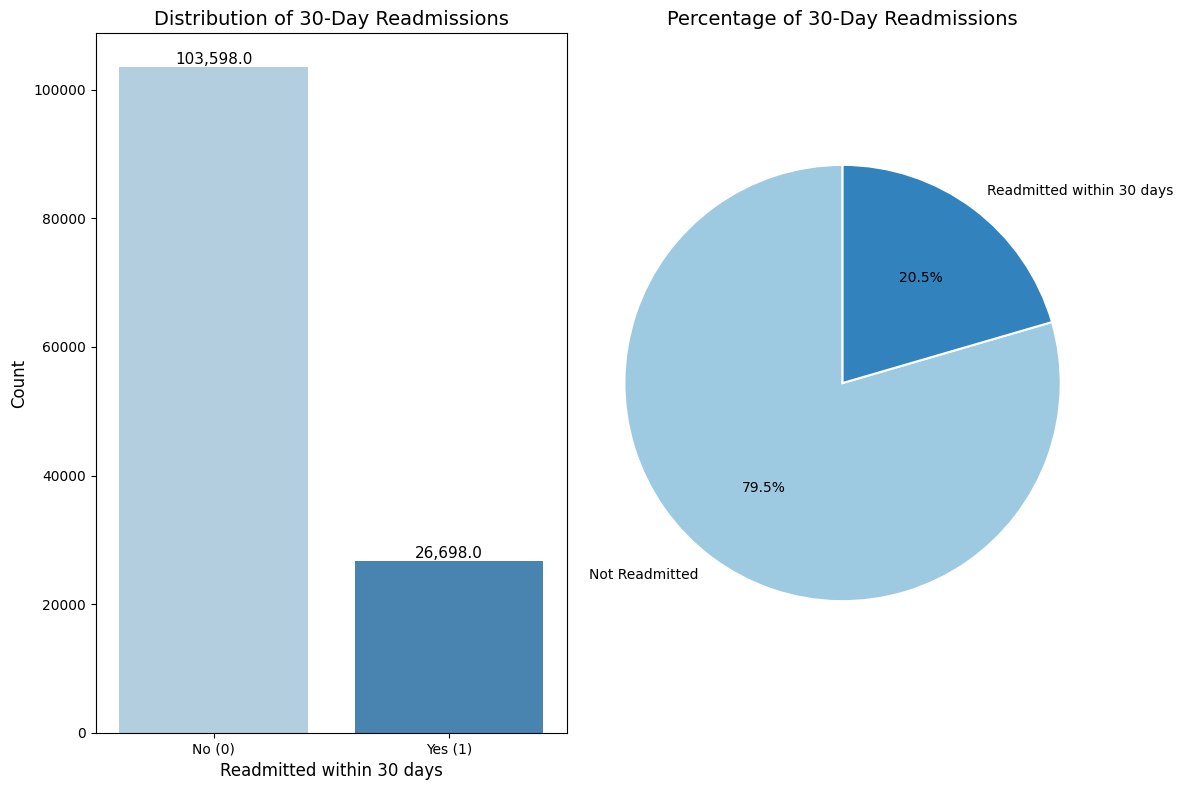

In [687]:
plt.figure(figsize=(12, 8))

# Create a countplot for Readmitted_30
plt.subplot(1, 2, 1)
sns.countplot(x='Readmitted_30', data=df, palette='Blues')
plt.title('Distribution of 30-Day Readmissions', fontsize=14)
plt.xlabel('Readmitted within 30 days', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])

# Add count labels on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=11)

# Create a pie chart showing percentage distribution
plt.subplot(1, 2, 2)
readmit_counts = df['Readmitted_30'].value_counts()
labels = ['Not Readmitted', 'Readmitted within 30 days']
colors = ['#9ecae1', '#3182bd']
plt.pie(readmit_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
plt.title('Percentage of 30-Day Readmissions', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [688]:
readmission_rate = df['Readmitted_30'].mean() * 100
print(f"30-Day Readmission Rate: {readmission_rate:.2f}%")
print(f"Total Patients: {len(df):,}")
print(f"Readmitted Patients: {df['Readmitted_30'].sum():,}")
print(f"Non-readmitted Patients: {len(df) - df['Readmitted_30'].sum():,}")

30-Day Readmission Rate: 20.49%
Total Patients: 130,296
Readmitted Patients: 26,698
Non-readmitted Patients: 103,598


#### Removing class imbalace from training data

In [689]:
y = df['Readmitted_30']

In [690]:
X_countbased = df_count_based.drop([ 'Readmitted_30'], axis=1)
X_position_based = df_position_based.drop([ 'Readmitted_30'], axis=1)
X_grouped_codes = df_grouped_codes.drop([ 'Readmitted_30'], axis=1)

In [691]:
from sklearn.model_selection import train_test_split

X_train_count, X_test_count, y_train, y_test = train_test_split(X_countbased, y, test_size=0.2, random_state=42)

X_train_position, X_test_position, y_train, y_test = train_test_split(X_position_based, y, test_size=0.2, random_state=42)

X_train_group, X_test_group, y_train, y_test = train_test_split(X_grouped_codes, y, test_size=0.2, random_state=42)

In [692]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_resampled_count, y_resampled_count = adasyn.fit_resample(X_train_count, y_train)

#

c:\Users\shame\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [693]:
X_resampled_position, y_resampled_position = adasyn.fit_resample(X_train_position, y_train)


c:\Users\shame\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [694]:
X_resampled_group, y_resampled_group = adasyn.fit_resample(X_train_group, y_train)


c:\Users\shame\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [695]:
y_resampled_count.info()

<class 'pandas.core.series.Series'>
RangeIndex: 165308 entries, 0 to 165307
Series name: Readmitted_30
Non-Null Count   Dtype
--------------   -----
165308 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


In [ ]:
# # saving preprocessed data
# X_resampled_count.to_csv('X_resampled_count.csv', index=False)
# X_resampled_position.to_csv('X_resampled_position.csv', index=False)
# X_resampled_group.to_csv('X_resampled_group.csv', index=False)
# y_resampled_count.to_csv('y_resampled_count.csv', index=False)
# y_resampled_position.to_csv('y_resampled_position.csv', index=False)
# y_resampled_group.to_csv('y_resampled_group.csv', index=False)

# X_test_count.to_csv('X_test_count.csv', index=False)
# X_test_position.to_csv('X_test_position.csv', index=False)
# X_test_group.to_csv('X_test_group.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

# Model Training

In [ ]:
# # without class imbalance in the dataset
# #       train
# X_resampled_count = pd.read_csv('X_resampled_count.csv')
# X_resampled_position = pd.read_csv('X_resampled_position.csv')
# X_resampled_group = pd.read_csv('X_resampled_group.csv')
# y_resampled_count = pd.read_csv('y_resampled_count.csv')
# y_resampled_position = pd.read_csv('y_resampled_position.csv')
# y_resampled_group = pd.read_csv('y_resampled_group.csv')
# #        test
# X_test_count = pd.read_csv('X_test_count.csv')
# X_test_position = pd.read_csv('X_test_position.csv')
# X_test_group = pd.read_csv('X_test_group.csv')
# y_test = pd.read_csv('y_test.csv')


# from sklearn.model_selection import train_test_split

# # Class imblance in the dataset
# df_count_based = pd.read_csv('df_count_based_class_imbalance.csv')
# df_position_based = pd.read_csv('df_position_based_class_imbalance.csv')
# df_grouped_codes = pd.read_csv('df_grouped_codes_class_imbalance.csv')


# X_countbased = df_count_based.drop([ 'Readmitted_30'], axis=1)
# X_position_based = df_position_based.drop([ 'Readmitted_30'], axis=1)
# X_grouped_codes = df_grouped_codes.drop([ 'Readmitted_30'], axis=1)
# y = df_count_based['Readmitted_30']

# X_train_count, X_test_count, y_train, y_test = train_test_split(X_countbased, y, test_size=0.2, random_state=42)
# X_train_position, X_test_position, y_train, y_test = train_test_split(X_position_based, y, test_size=0.2, random_state=42)
# X_train_group, X_test_group, y_train, y_test = train_test_split(X_grouped_codes, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler


In [24]:
def train_logistic_regression(X_train, X_test, y_train, y_test):
    """
    Train and evaluate a Logistic Regression model with data scaling.
    Parameters:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels

    Returns:
        lr: Trained Logistic Regression model
        metrics: Dictionary containing evaluation metrics
    """

    scaler = StandardScaler()

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    lr = LogisticRegression(random_state=42, max_iter=10000)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)
    y_pred_proba = lr.predict_proba(X_test)[:, 1]

    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }

    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print(f"ROC AUC Score: {metrics['roc_auc']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------")

    return lr, metrics

lr_metrics_dict = {}

print("Training Logistic Regression on Count-Based Features...")
lr_model1, lr_metrics_dict['count'] = train_logistic_regression(X_resampled_count,X_test_count,y_resampled_count, y_test)

print("Training Logistic Regression on position...")
lr_model2, lr_metrics_dict['position'] = train_logistic_regression(X_resampled_position,X_test_position,y_resampled_position, y_test)

print("Training Logistic Regression on group...")
lr_model3, lr_metrics_dict['group'] = train_logistic_regression(X_resampled_group,X_test_group,y_resampled_group, y_test)

Training Logistic Regression on Count-Based Features...


c:\Users\shame\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5569
Precision: 0.2434
Recall: 0.5588
F1 Score: 0.3391
ROC AUC Score: 0.5890

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.56      0.67     20759
           1       0.24      0.56      0.34      5301

    accuracy                           0.56     26060
   macro avg       0.54      0.56      0.50     26060
weighted avg       0.71      0.56      0.60     26060

----------------------------------------
Training Logistic Regression on position...


c:\Users\shame\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.5625
Precision: 0.2519
Recall: 0.5844
F1 Score: 0.3521
ROC AUC Score: 0.6113

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.56      0.67     20759
           1       0.25      0.58      0.35      5301

    accuracy                           0.56     26060
   macro avg       0.55      0.57      0.51     26060
weighted avg       0.72      0.56      0.61     26060

----------------------------------------
Training Logistic Regression on group...


c:\Users\shame\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6303
Precision: 0.2268
Recall: 0.3394
F1 Score: 0.2719
ROC AUC Score: 0.5418

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75     20759
           1       0.23      0.34      0.27      5301

    accuracy                           0.63     26060
   macro avg       0.52      0.52      0.51     26060
weighted avg       0.69      0.63      0.65     26060

----------------------------------------


In [5]:
def train_random_forest(X_train, X_test, y_train, y_test, feature_selection=False, hyperparameter_tuning=False):
    """
    Train and evaluate an improved Random Forest model with optional feature selection
    and simplified hyperparameter approach for faster execution
    
    Parameters:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels
        feature_selection: Whether to perform feature selection
        hyperparameter_tuning: Whether to tune hyperparameters (limited scope)

    Returns:
        rf: Trained Random Forest model
        metrics: Dictionary containing evaluation metrics
    """
    from sklearn.preprocessing import StandardScaler
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
    import pandas as pd
    import numpy as np
    
    print("Preprocessing data...")
    # Preserve column names for feature importance analysis
    feature_names = None
    if hasattr(X_train, 'columns'):
        feature_names = X_train.columns.tolist()
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # If feature names were available, convert back to DataFrame after scaling
    if feature_names is not None:
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
    
    # Feature selection if requested and we have feature names
    if feature_selection and feature_names is not None:
        print("Performing feature selection...")
        # Use a smaller, faster model for feature selection
        prelim_rf = RandomForestClassifier(
            n_estimators=50,  # Reduced from 100
            max_depth=10,
            random_state=42, 
            class_weight='balanced',
            n_jobs=-1
        )
        prelim_rf.fit(X_train_scaled, y_train)
        
        # Get feature importances
        importances = prelim_rf.feature_importances_
        
        # Create DataFrame of features and their importance
        feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        # Select top 80% most important features
        cumulative_importance = 0
        important_features = []
        for i, row in feature_importance.iterrows():
            important_features.append(row['feature'])
            cumulative_importance += row['importance']
            if cumulative_importance >= 0.8:  # Slightly increased threshold
                break
        
        print(f"Selected {len(important_features)} out of {len(feature_names)} features")
        
        # Keep only selected features
        if isinstance(X_train_scaled, pd.DataFrame):
            X_train_scaled = X_train_scaled[important_features]
            X_test_scaled = X_test_scaled[important_features]
    
    # Hyperparameter approach - use pre-optimized parameters for speed
    if hyperparameter_tuning:
        # Instead of full grid search, try just 2-3 promising configurations
        print("Using limited hyperparameter configurations...")
        
        # Try these 3 promising configurations
        param_configs = [
            # Configuration 1: Balanced with moderate depth
            {
                'n_estimators': 300,
                'max_depth': 15,
                'min_samples_split': 5,
                'min_samples_leaf': 2,
                'max_features': 'sqrt',
                'bootstrap': True,
                'class_weight': 'balanced',
                'n_jobs': -1,
                'random_state': 42
            },
            # Configuration 2: Deeper trees
            {
                'n_estimators': 200,
                'max_depth': 25,
                'min_samples_split': 2,
                'min_samples_leaf': 1,
                'max_features': 'sqrt',
                'bootstrap': True,
                'class_weight': 'balanced',
                'n_jobs': -1,
                'random_state': 42
            },
            # Configuration 3: More trees, balanced subsample
            {
                'n_estimators': 400,
                'max_depth': 12,
                'min_samples_split': 5,
                'min_samples_leaf': 2,
                'max_features': 'log2',
                'bootstrap': True,
                'class_weight': 'balanced_subsample',
                'n_jobs': -1,
                'random_state': 42
            }
        ]
        
        # Simple validation approach instead of CV
        best_accuracy = 0
        best_config = None
        best_model = None
        
        # Use a small validation split from training data
        from sklearn.model_selection import train_test_split
        X_train_sub, X_val, y_train_sub, y_val = train_test_split(
            X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
        )
        
        # Try each configuration
        for i, config in enumerate(param_configs):
            print(f"Testing configuration {i+1}/3...")
            
            # Train model with this configuration
            model = RandomForestClassifier(**config)
            model.fit(X_train_sub, y_train_sub)
            
            # Evaluate on validation set
            y_val_pred = model.predict(X_val)
            accuracy = roc_auc_score(y_val, y_val_pred)
            
            print(f"Configuration {i+1} Accuracy: {accuracy:.4f}")
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_config = config
                best_model = model
        
        print(f"Best configuration accuracy: {best_accuracy:.4f}")
        
        # Retrain the best model on full training data
        rf = RandomForestClassifier(**best_config)
        
    else:
        # Use a better default configuration optimized for both speed and performance
        rf = RandomForestClassifier(
            n_estimators=300,
            max_depth=15,
            min_samples_leaf=2,
            min_samples_split=5,
            max_features='sqrt',
            bootstrap=True,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1  # Use all cores
        )
    
    print("Training final model...")
    # Fit the model
    rf.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_test_scaled)
    y_pred_proba = rf.predict_proba(X_test_scaled)[:,1]
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print(f"ROC AUC Score: {metrics['roc_auc']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print top features if we have feature names
    if feature_names is not None and isinstance(X_train_scaled, pd.DataFrame):
        feature_names = X_train_scaled.columns.tolist()
        if len(feature_names) > 0:
            print("\nTop 10 Feature Importance:")
            feature_importance = rf.feature_importances_
            sorted_idx = np.argsort(feature_importance)[::-1]
            for i in range(min(10, len(feature_names))):
                print(f"{feature_names[sorted_idx[i]]}: {feature_importance[sorted_idx[i]]:.4f}")
    
    print("----------------------------------------")
    
    return rf, metrics

# Update the function calls
rf_metrics_dict = {}

In [6]:

print("Training Random Forest on Count-Based Features...")
rf_model1, rf_metrics_dict['count'] = train_random_forest(X_resampled_count, X_test_count, y_resampled_count, y_test)


Training Random Forest on Count-Based Features...
Preprocessing data...
Training final model...


c:\Users\shame\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.6675
Precision: 0.2676
Recall: 0.3656
F1 Score: 0.3090
ROC AUC Score: 0.5974

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78     20759
           1       0.27      0.37      0.31      5301

    accuracy                           0.67     26060
   macro avg       0.54      0.56      0.55     26060
weighted avg       0.71      0.67      0.69     26060


Top 10 Feature Importance:
AD_DGNS_encoded: 0.4604
STAY_DRG_CD: 0.1064
num_diagnoses: 0.0824
STUS_CD_encoded: 0.0668
discharge_month: 0.0583
LENGTH_OF_STAY: 0.0580
TYPE_ADM_encoded: 0.0564
admit_dayofweek: 0.0481
num_procedures: 0.0384
SRC_ADMS_encoded: 0.0247
----------------------------------------


In [7]:
print("Training Random Forest on position...")
# This was using train_logistic_regression incorrectly - fixed to use Random Forest
rf_model2, rf_metrics_dict['position'] = train_random_forest(X_resampled_position, X_test_position, y_resampled_position, y_test)


Training Random Forest on position...
Preprocessing data...
Training final model...


c:\Users\shame\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7099
Precision: 0.2940
Recall: 0.3043
F1 Score: 0.2991
ROC AUC Score: 0.6231

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82     20759
           1       0.29      0.30      0.30      5301

    accuracy                           0.71     26060
   macro avg       0.56      0.56      0.56     26060
weighted avg       0.71      0.71      0.71     26060


Top 10 Feature Importance:
AD_DGNS_encoded: 0.3327
primary_diagnosis_encoded: 0.2203
treatment_ratio: 0.0937
primary_condition_treated: 0.0802
STAY_DRG_CD: 0.0739
STUS_CD_encoded: 0.0435
LENGTH_OF_STAY: 0.0412
discharge_month: 0.0376
TYPE_ADM_encoded: 0.0335
admit_dayofweek: 0.0297
----------------------------------------


In [8]:

print("Training Random Forest on group...")
# This was using train_logistic_regression incorrectly - fixed to use Random Forest
rf_model3, rf_metrics_dict['group'] = train_random_forest(X_resampled_group, X_test_group, y_resampled_group, y_test)

Training Random Forest on group...
Preprocessing data...
Training final model...


c:\Users\shame\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.6646
Precision: 0.2382
Recall: 0.2950
F1 Score: 0.2636
ROC AUC Score: 0.5742

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78     20759
           1       0.24      0.30      0.26      5301

    accuracy                           0.66     26060
   macro avg       0.52      0.53      0.52     26060
weighted avg       0.69      0.66      0.68     26060


Top 10 Feature Importance:
AD_DGNS_encoded: 0.1805
diag_code_I10: 0.0663
STAY_DRG_CD: 0.0635
discharge_month: 0.0500
LENGTH_OF_STAY: 0.0488
diag_code_Z90: 0.0472
STUS_CD_encoded: 0.0458
admit_dayofweek: 0.0399
TYPE_ADM_encoded: 0.0386
diag_code_Z88: 0.0381
----------------------------------------


In [9]:
def train_catboost(X_train, X_test, y_train, y_test):
    """
    Train and evaluate a CatBoost model
    Parameters:
        X_train, X_test: Training and test features
        y_train, y_test: Training and test labels

    Returns:
        cat: Trained CatBoost model
        metrics: Dictionary containing evaluation metrics
    """
    # Initialize and train the model
    cat = CatBoostClassifier(random_state=42, verbose=0)
    cat.fit(X_train, y_train)

    # Make predictions
    y_pred = cat.predict(X_test)
    y_pred_proba = cat.predict_proba(X_test)[:,1]

    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }

    # Print results
    print("----------------------------------------")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1']:.4f}")
    print(f"ROC AUC Score: {metrics['roc_auc']:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return cat, metrics

# Store metrics for CatBoost models
cat_metrics_dict = {}


In [10]:

# Train and evaluate CatBoost on dataset 1
print("Training CatBoost on Count-Based Features resammpled...")
cat_model1, cat_metrics_dict['dataset1'] = train_catboost(X_resampled_count,X_test_count,y_resampled_count, y_test)





Training CatBoost on Count-Based Features resammpled...


----------------------------------------
Accuracy: 0.7340
Precision: 0.2854
Recall: 0.2047
F1 Score: 0.2384
ROC AUC Score: 0.5972

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84     20759
           1       0.29      0.20      0.24      5301

    accuracy                           0.73     26060
   macro avg       0.55      0.54      0.54     26060
weighted avg       0.70      0.73      0.72     26060



In [11]:
print("Training CatBoost on position resammpled...")
cat_model2, cat_metrics_dict['position'] = train_catboost(X_resampled_position, X_test_position, y_resampled_position, y_test)



Training CatBoost on position resammpled...
----------------------------------------
Accuracy: 0.7708
Precision: 0.3184
Recall: 0.1113
F1 Score: 0.1649
ROC AUC Score: 0.6164

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     20759
           1       0.32      0.11      0.16      5301

    accuracy                           0.77     26060
   macro avg       0.56      0.53      0.52     26060
weighted avg       0.71      0.77      0.72     26060



In [12]:
print("Training CatBoost on position...")
cat_modelx, cat_metrics_dict['dataset2'] = train_catboost(X_train_position, X_test_position, y_train, y_test)



Training CatBoost on position...
----------------------------------------
Accuracy: 0.7993
Precision: 0.6224
Recall: 0.0345
F1 Score: 0.0654
ROC AUC Score: 0.6509

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     20759
           1       0.62      0.03      0.07      5301

    accuracy                           0.80     26060
   macro avg       0.71      0.51      0.48     26060
weighted avg       0.76      0.80      0.72     26060



In [13]:
print("Training CatBoost on group...")
cat_model3, cat_metrics_dict['dataset3'] = train_catboost(X_train_group, X_test_group, y_train, y_test)



Training CatBoost on group...
----------------------------------------
Accuracy: 0.7972
Precision: 0.5408
Recall: 0.0200
F1 Score: 0.0386
ROC AUC Score: 0.6449

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     20759
           1       0.54      0.02      0.04      5301

    accuracy                           0.80     26060
   macro avg       0.67      0.51      0.46     26060
weighted avg       0.75      0.80      0.71     26060



In [14]:
print("Training CatBoost on group resammpled...")
cat_model3, cat_metrics_dict['group'] = train_catboost(X_resampled_group, X_test_group, y_resampled_group, y_test)


Training CatBoost on group resammpled...
----------------------------------------
Accuracy: 0.7248
Precision: 0.2595
Recall: 0.1903
F1 Score: 0.2196
ROC AUC Score: 0.5767

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83     20759
           1       0.26      0.19      0.22      5301

    accuracy                           0.72     26060
   macro avg       0.53      0.53      0.53     26060
weighted avg       0.70      0.72      0.71     26060



# Testing

In [18]:
from sklearn.preprocessing import LabelEncoder
import joblib

def preprocess_p1(test_df):
      test_df = test_df.replace('-', pd.NA)

      ID = test_df['ID']
      test_df.drop(columns=['ID'], inplace=True)

      test_df['STAY_DRG_CD'] = test_df['STAY_DRG_CD'].fillna(test_df['stay_drg_cd'])
      test_df['STAY_DRG_CD'] = test_df['STAY_DRG_CD'].fillna(test_df['STAY_DRG_CD'].mode()[0])
      test_df.drop(columns=['stay_drg_cd'], inplace=True)
      test_df['STAY_DRG_CD'] = test_df['STAY_DRG_CD'].astype('int')

      test_df['STAY_FROM_DT'] = pd.to_datetime(test_df['STAY_FROM_DT'])
      test_df['STAY_THRU_DT'] = pd.to_datetime(test_df['STAY_THRU_DT'])
      test_df['LENGTH_OF_STAY'] = (test_df['STAY_THRU_DT'] - test_df['STAY_FROM_DT']).dt.days
      test_df['admit_dayofweek'] = test_df['STAY_FROM_DT'].dt.dayofweek
      test_df['discharge_month'] = test_df['STAY_THRU_DT'].dt.month
      test_df.drop(columns=['STAY_FROM_DT','STAY_THRU_DT'], inplace=True)

      le = LabelEncoder()
      test_df['STUS_CD_encoded'] = le.fit_transform(test_df['STUS_CD'])
      test_df.drop(columns=['STUS_CD'], inplace=True)

      le = LabelEncoder()
      test_df['TYPE_ADM_encoded'] = le.fit_transform(test_df['TYPE_ADM'])
      test_df.drop(columns=['TYPE_ADM'], inplace=True)

      le = LabelEncoder()
      test_df['SRC_ADMS_encoded'] = le.fit_transform(test_df['SRC_ADMS'])
      test_df.drop(columns=['SRC_ADMS'], inplace=True)


      global_mean = joblib.load('global_mean.pkl')
      target_encoded = joblib.load('target_encoded.pkl')
      test_df['AD_DGNS_encoded'] = test_df['AD_DGNS'].map(target_encoded)
      test_df['AD_DGNS_encoded'] = test_df['AD_DGNS_encoded'].fillna(global_mean)
      test_df.drop(columns=['AD_DGNS'], inplace=True)

      


      return test_df,ID


def preprocess_p2(test_df,ID,method):
      proc_columns = [f'PRCDRCD{str(i).zfill(2)}' for i in range(1, 26)]
      diag_columns = [f'DGNSCD{str(i).zfill(2)}' for i in range(1, 26)]
      # Method 1: Count-Based Features
      if method == 'count':
            df_count_based_temp = test_df.copy()
            df_count_based_temp['num_diagnoses'] = df_count_based_temp[diag_columns].notna().sum(axis=1)
            df_count_based_temp['num_procedures'] = df_count_based_temp[proc_columns].notna().sum(axis=1)
            df_count_based_temp.drop(columns=diag_columns + proc_columns, inplace=True)
            return df_count_based_temp,ID
      # Method 2: Position-Based Features
      elif method == 'position':
            df_position_based_temp = test_df.copy()
            df_position_based_temp['primary_diagnosis'] = df_position_based_temp['DGNSCD01']
            df_position_based_temp['primary_condition_treated'] = df_position_based_temp[['DGNSCD01', 'PRCDRCD01']].notna().all(axis=1).astype(int)
            df_position_based_temp['treatment_ratio'] = df_position_based_temp.apply(calculate_diag_proc_ratio, axis=1)
            primary_diag_target_encoding = joblib.load('primary_diag_target_encoding.pkl')
            global_mean = joblib.load('global_mean.pkl')
            df_position_based_temp['primary_diagnosis_encoded'] = df_position_based_temp['primary_diagnosis'].map(primary_diag_target_encoding)
            df_position_based_temp['primary_diagnosis_encoded'] = df_position_based_temp['primary_diagnosis_encoded'].fillna(global_mean)
            df_position_based_temp.drop(columns=['primary_diagnosis'], inplace=True)
            df_position_based_temp.drop(columns=diag_columns + proc_columns, inplace=True)
            return df_position_based_temp,ID
      # Method 3: Group/Select Important Codes
      elif method == 'group':
            df_grouped_codes_temp = test_df.copy()
            for col in diag_columns:
                df_grouped_codes_temp[col] = df_grouped_codes_temp[col].astype(str).str[:3]
            top_diag_groups = pd.Series(df_grouped_codes_temp[diag_columns].values.ravel()).value_counts().nlargest(20).index
            for code in top_diag_groups:
                df_grouped_codes_temp[f'diag_code_{code}'] = df_grouped_codes_temp[diag_columns].apply(lambda x: code in x.values, axis=1).astype(int)
            df_grouped_codes_temp.drop(columns=diag_columns + proc_columns, inplace=True)
            return df_grouped_codes_temp,ID
      
      
      



In [19]:
test_df = pd.read_csv('test.csv')

df_count_based_temp,ID = preprocess_p1(test_df)

df_count_based_temp,ID = preprocess_p2(df_count_based_temp,ID,'position')

In [22]:
predictions = cat_modelx.predict(df_count_based_temp)

In [23]:
pd.DataFrame({'ID': ID, 'Readmitted_30': predictions}).to_csv('submission_catboost.csv', index=False)

In [9]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

y_pred = pd.read_csv('submission_catboost.csv')
y_acc = pd.read_csv('solution.csv')

In [11]:
print('Accuracy:', accuracy_score(y_acc['Readmitted_30'], y_pred['Readmitted_30']))
print('Precision:', precision_score(y_acc['Readmitted_30'], y_pred['Readmitted_30']))
print('Recall:', recall_score(y_acc['Readmitted_30'], y_pred['Readmitted_30']))
print('F1 Score:', f1_score(y_acc['Readmitted_30'], y_pred['Readmitted_30']))
print('ROC AUC Score:', roc_auc_score(y_acc['Readmitted_30'], y_pred['Readmitted_30']))


Accuracy: 0.7898695318495779
Precision: 0.2747875354107649
Recall: 0.014507927011666168
F1 Score: 0.02756073305867311
ROC AUC Score: 0.5023097787169266
